<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(data.head())

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1    41.00  49600.00            1                  0
1    0    46.00  38000.00            1                  1
2    0    29.00  21000.00            0                  0
3    0    21.00  41700.00            2                  0
4    1    28.00  26100.00            0                  0

In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

In [5]:
display(data.isnull().sum())

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
data.describe(include='all')

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
count 5000.00  5000.00   5000.00      5000.00            5000.00
mean     0.50    30.95  39916.36         1.19               0.15
std      0.50     8.44   9900.08         1.09               0.46
min      0.00    18.00   5300.00         0.00               0.00
25%      0.00    24.00  33300.00         0.00               0.00
50%      0.00    30.00  40200.00         1.00               0.00
75%      1.00    37.00  46600.00         2.00               0.00
max      1.00    65.00  79000.00         6.00               5.00

В таблице данных 5тыс. строк и 5 столбцов. Пропусков данных нет. Типы данных в изменении не нуждаются. 

Данные практически равномерно распределены по признаку пола. Средний возраст застрахованного составляет 30 лет. Размах по возрасту  составляет от 18 до 65 лет. Средняя зарплата 40 200 руб. Минимальная зарплата - 9 900 руб., максимальная 79 000 руб. Наибольшее число членов семьи - 6 человек. В среднем, у застрахованного имеется один член семьи. Наибольшее число обращений за страховыми выплатами - 5 раз.

Проверим данные на выбросы.

In [7]:
#data.hist(column=data.columns.to_list(), figsize=(20, 15), bins=25)
#plt.suptitle('Гистограмма признаков', fontsize=19, fontweight='bold')
#plt.show()

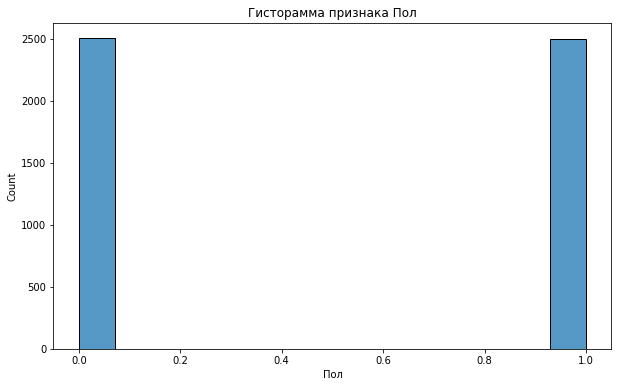

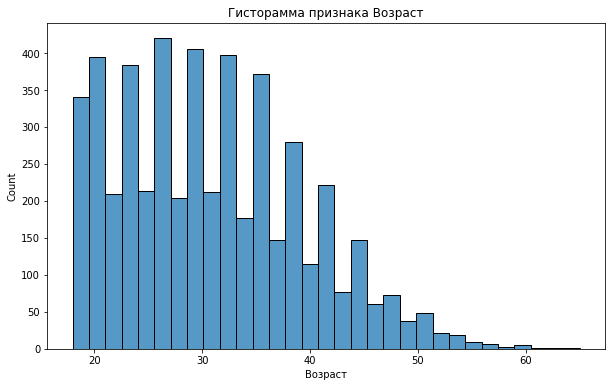

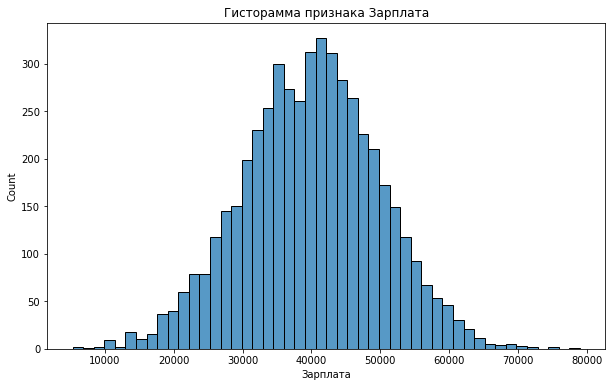

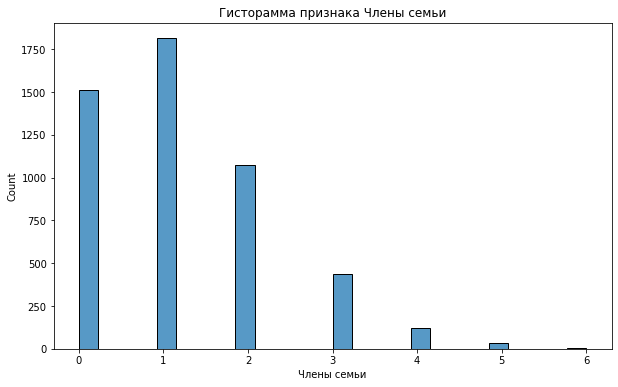

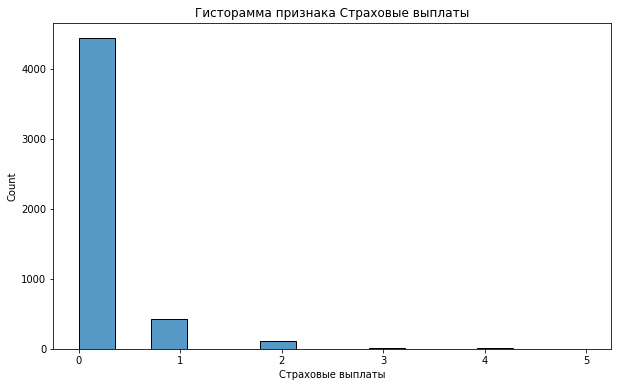

In [8]:
columns=data.columns.to_list()
for col in columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data[col])
    plt.title(f'Гисторамма признака {col}')
    plt.show()

Выбросов в данных не выявлено. Смещение выборки по признаку возраст обусловлено тем, что страховаться могут только совершеннолетние. В данных о зарплате имеется два пика. Может быть вызвано тем, что объединены данные из двух источников (например, из двух страховых пунктов, расположенных в бедном и богатом районах). Вызывают сомнения данные о членах семьи. Вполне возможны погрешности при регистрации данного признака.

Исследуем целевой признак.

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data['Страховые выплаты'].value_counts(normalize=True)

0   0.88720
1   0.08460
2   0.02300
3   0.00360
4   0.00140
5   0.00020
Name: Страховые выплаты, dtype: float64

88,7% клиентов не получали страховых выплат за последние 5 лет. 8,4% клиентов получили одну выплату. Менее 3% клиентов получили две и более выплат.

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(data[data.duplicated()].head())

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
281    1    39.00  48100.00            1                  0
488    1    24.00  32900.00            1                  0
513    0    31.00  37400.00            2                  0
718    1    22.00  32600.00            1                  0
785    0    20.00  35800.00            0                  0

In [11]:
data.duplicated().sum()

153

В данных имеется 153 дубликата. Удалим их.

In [12]:
data.drop_duplicates(inplace=True)

Подготовым данные для модели

In [13]:
features = data.drop('Страховые выплаты', axis=1)

In [14]:
target = data['Страховые выплаты']

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Не изменится

**Обоснование:** 
необходимо доказать, что новый вектор предсказаний A после преобразований матрицы признаков равен вектору предсказаний до преобразований a.

Запишем новое представление матрицы признаков с учетом умножения на обратимую матрицу: $Z = XP$  
Тогда новый вектор с предсказаниями: $A = ZW$, где $W = (Z^𝑇 Z)^{−1} Z^𝑇 𝑦$   
$A = Z (Z^T Z)^{-1} Z^T y = XP ((XP)^T (XP))^{-1} (XP)^T y $   
Учитывая, что $(AB)^{-1} = B^{-1} A^{-1}$, раскроем $A = XP ((XP)^T (XP))^{-1} (XP)^T y$  
$A = XP(XP)^{-1}((XP)^T)^{-1} (XP)^T y = XPP^{-1}X^{-1}((XP)^T)^{-1} (XP)^T y$ $((XP)^T (XP))^{-1}$  
При умножении матрицы на обратную ей получается единичная матрица $A A^{-1} = A^{-1} A = E$, умножение на которую не меняет матрицу так как $AE = EA = A$  
Учитывая, что $(AB)^T=B^T A^T$ раскроем $((XP)^T)^{-1} (XP)^T$  
$A = XEX^{-1}((XP)^T)^{-1} (XP)^T y = XX^{-1}(P^T X^T)^{-1} P^T X^T y = XX^{-1} (X^T)^{-1} (P^T)^{-1}  P^T X^T y$  
Вновь получается единичная матрица  $(P^T)^{-1}  P^T = E$  
Заканчиваем преобразование:$A = XX^{-1} (X^T)^{-1} E X^T y = X(X^T X)^{-1} X^T y = Xw = a$


<div class="alert alert-info">
<b>Комментарий студента №2</b>
    
Попробуем снова.
    
Запишем новое представление матрицы признаков с учетом умножения на обратимую матрицу: $Z = XP$  
Тогда новый вектор с предсказаниями: $A = ZW$, где $W = (Z^𝑇 Z)^{−1} Z^𝑇 𝑦$ 
    
$W =  ((XP)^T XP)^{-1} (XP)^T y = (X^T P^T X P)^{-1} (XP)^T y = (X^T X P^T P)^{-1} (XP)^T y ,$  
где $(X^T X), P^T, P $  - обратимые квадратные матрицы.  

Учитывая, что $(ABC)^{-1} = C^{-1}(AB)^{-1} = (BC)^{-1}A^{-1} = C^{-1}B^{-1}A^{-1}$,  
    
$W = P^{-1} (P^T)^{-1} (X^T X)^{-1}  P^T X^T y  $  
    
Так как $w = (X^T X)^{-1} X^T y $, а $(P^T)^{-1}  P^T = E$,  тогда $W =  P^{-1} w   $  
    
$ A = X P W = X P  P^{-1} w = X E w = X w = a$ , что и требовалось доказать   

</div>


<div class="alert alert-info">
<b>Комментарий студента №2</b>  
    
$W =  ((XP)^T XP)^{-1} (XP)^T y = ({ P^T X^T} X P)^{-1} (XP)^T y $
</div>    

<div class="alert alert-success">
<b>Комментарий ревьюера №4</b> ✅
    
Запишем новое представление матрицы признаков с учетом умножения на обратимую матрицу: $Z = XP$  
Тогда новый вектор с предсказаниями: $A = ZW$, где $W = (Z^𝑇 Z)^{−1} Z^𝑇 𝑦$ 
    
$W =  ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T X P)^{-1} (XP)^T y = (P^T (X^T X) P)^{-1} (XP)^T y ,$  
где $(X^T X), P^T, P $  - обратимые квадратные матрицы.  

Учитывая, что $(ABC)^{-1} = C^{-1}(AB)^{-1} = (BC)^{-1}A^{-1} = C^{-1}B^{-1}A^{-1}$,  
    
$W = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y  $  
    
Так как $w = (X^T X)^{-1} X^T y $, а $(P^T)^{-1}  P^T = E$,  тогда $W =  P^{-1} w   $  
    
$ A = X P W = X P  P^{-1} w = X E w = X w = a$ , что и требовалось доказать   
</div>

Данное преобразование выполняет масштабирование признаков. Соответственно, расстояния хоть и изменятся в абсолютном выражении, но относительно друг друга не изменятся. Масштабирование признаков не повлияет на качество модели.

## Алгоритм преобразования

**Алгоритм**



Шифрование данных случайно созданной матрицей позволит нам быть уверенными, что персональные данные не похитят, так как ключ будет полностью случайным и не будет нигде храниться.

In [15]:
  def matrix_mult(features):
    
        columns = features.columns
        #matrix = np.zeros(shape = (len(features.columns), len(features.columns)))
        invert_exsist = True
        while invert_exsist:
            try:
                matrix = np.random.normal(size=(len(columns), len(columns)))
                np.linalg.inv(matrix)
                invert_exsist = False
            except:
                invert_exsist = True
                
                    
        data = features.values @ matrix
        data = pd.DataFrame(data=data, columns = columns)
               
        return data        

In [16]:
print(features.head())

   Пол  Возраст  Зарплата  Члены семьи
0    1    41.00  49600.00            1
1    0    46.00  38000.00            1
2    0    29.00  21000.00            0
3    0    21.00  41700.00            2
4    1    28.00  26100.00            0


In [17]:
matrix = matrix_mult(features)

In [18]:
print(matrix.head())

      Пол  Возраст  Зарплата  Члены семьи
0 7761.23 68234.42 -23907.77      6426.61
1 5946.48 52282.78 -18320.98      4915.61
2 3286.44 28894.65 -10126.01      2714.67
3 6525.37 57362.06 -20095.62      5411.20
4 4083.82 35907.60 -12582.50      3377.76


**Обоснование**

Для защиты данных достаточно будет умножить таблицу признаков на случайную обратимую матрицу, содержащую столько жк строк, сколько таблица признаков имеет столбцов. Обратимая матрица должна быть квадратной. Исходя их анализа данных, создадим случайную обратимую матрицу размером 4 х 4 и умножим таблицу признаков на случайную матрицу. Ранее мы доказали, что при умножении исходных признаков на обратимую матрицу качество модели не изменится. Так есть небольшая вероятность того, что созданная случайным образом матрица не будет иметь обратной, то мы осуществляем проверку наличия обратной матрицы. И только убедившись в том, что такая существует - умножаем исходные признаки на сгенерированную матрицу.

## Проверка алгоритма

In [19]:
def check_alg(features, target):
    
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    r2 = r2_score(target_test, predictions)
    return round(r2, 10)

In [20]:
native_alg_r2 = check_alg(features, target)
print(native_alg_r2)

0.4230772749


In [21]:
matrix_alg_r2 = check_alg(matrix, target)
print(matrix_alg_r2)

0.4230772749


Проверяем равенство метрик.

In [22]:
print(native_alg_r2==matrix_alg_r2)

True


**Вывод**
В данном проекте в качестве алгоритма шифрования предлагается умножение матрицы признаков на обратимую квадратную матрицу. Приведено теоретическое обоснование данного алгоритма. 

Предложены два варианта его реализации. На практике подтверждено, что шифрование данных не повлияло на качество прогноза линейной регрессии. Для оценки применялась метрика качества R2.

Показатели r2 модели матрицы признаков и модели на зашифрованных данных совпали. Это подтверждает наше утверждение, что умножение на матрицы признаков на случайную квадратную матрицу зашифровывает данные, и не влияет на качество оценки модели машинного обучения. 